<a href="https://colab.research.google.com/github/guptamols/zero_to_hero_nn/blob/main/micro_grad_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### References
https://github.com/AayushSameerShah/Neural-Net-Zero-to-Hero-with-Andrej

https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b

https://medium.com/@0ssamaak0/how-open-ais-andrej-karpathy-made-one-of-the-best-tutorials-in-deep-learning-e6b6445a2d05

https://github.com/karpathy/nn-zero-to-hero/tree/master

https://colab.research.google.com/drive/11SbzRCfRAXyveiri8CJ7Bjbn4MfiyvsL#scrollTo=yk3QDMPjWyYp

https://github.com/Anri-Lombard/micrograd

In [1]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [2]:
import os
os.chdir('gdrive/MyDrive/zero_to_hero_nn/zero_to_hero_nn')

In [3]:
! pwd

/content/gdrive/MyDrive/zero_to_hero_nn/zero_to_hero_nn


Neural Network has inputs and weights. These inputs and weights are multiplied and then added through complicated layers.

To implement this Karpathy is demonstrating building a Value object which basically is a data structure / mathematical expression that:
- How the output was constructured. What made what
- Which operations made what e.g. * / + / tanh / sigmoid etc
- Also calculate the derivatives of the weights so that we know how much the weights need to be changed

The nn.py has 4 classes: class Module, Neuron, Layer, MLP

In [4]:
class Value:

    def __init__(self,data,_children=(),_op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self,other):
        out = Value(self.data + other.data, (self,other),'+')
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other),'*')
        return out


a = Value(2.0)
b = Value(-3.0)
c = Value(10)
d=a*b + c

d

Value(data=4.0)

In [5]:
d._prev

{Value(data=-6.0), Value(data=10)}

In [6]:
d._op

'+'

In [7]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    # dot.node(name = uid, label = "{data %.4f}" % (n.data), shape='record')
    dot.node(name = uid, label = f"data {n.data:.4f}", shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

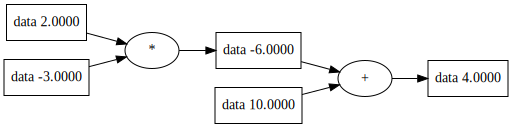

In [8]:
draw_dot(d)

In [9]:
d._prev, d._op

({Value(data=-6.0), Value(data=10)}, '+')

In [10]:
for n in d._prev:
    print(n)
    print(n._prev,n._op)

Value(data=-6.0)
{Value(data=2.0), Value(data=-3.0)} *
Value(data=10)
set() 


In [11]:
trace(d)

({Value(data=-3.0),
  Value(data=-6.0),
  Value(data=10),
  Value(data=2.0),
  Value(data=4.0)},
 {(Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-6.0), Value(data=4.0)),
  (Value(data=10), Value(data=4.0)),
  (Value(data=2.0), Value(data=-6.0))})

In [12]:
nodes, edges = trace(d)

In [13]:
nodes

{Value(data=-3.0),
 Value(data=-6.0),
 Value(data=10),
 Value(data=2.0),
 Value(data=4.0)}

In [14]:
for element in nodes:
    print(id(element))

132011207487120
132011207490816
132011207488800
132011207486928
132011207483376


In [15]:
edges

{(Value(data=-3.0), Value(data=-6.0)),
 (Value(data=-6.0), Value(data=4.0)),
 (Value(data=10), Value(data=4.0)),
 (Value(data=2.0), Value(data=-6.0))}